In [17]:
# YoutubeModule Class
from CrawlingModule import YoutubeBuilder
import pandas as pd
import Preprocessing as prep
import numpy as np
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from PIL import Image
from collections import Counter

# KEY 파일로 읽어오기
KEY_FILE = open('./API_KEY.txt', 'r')

# API_KEY 할당
API_KEY = KEY_FILE.readline().split(':')[1]

# YoutbeModule Instarnce 
bulider = YoutubeBuilder(API_KEY)

In [244]:
# channelId = bulider.search_get_channelId('할명수')
# video_id_list = bulider.search_get_videoId_in_channel(channelId=channelId)

# video_list = bulider.get_videos_in_videoId_list(videoId_list=video_id_list)

In [245]:
# comments_list, none_video_id_list = bulider.get_comments(video_id_list)

In [ ]:
# df = pd.DataFrame(video_id_list, columns=['video_id'])
# (df.video_id.value_counts() > 2).values

In [ ]:
# # video_id,category_id,category_name,title,views_count,like_count,uploaded_at
# df = pd.DataFrame(video_list, columns=['video_id', 'category_id', 'category_name', 'title', 'views_count', 'like_count', 'uploaded_at', 'tags'])

# df.tags = chim_df.tags.apply(lambda x : prep.extract_tags(x, name='#할명수 '))
# df.uploaded_at = pd.to_datetime(chim_df.uploaded_at)
# df.to_csv('./데이터/할명수_videos.csv', index=False)

In [ ]:
# df = pd.DataFrame(comments_list, columns=['video_id', 'comment_id', 'comment', 'like_count', 'created_at', 'updated_at'])
# df.created_at = pd.to_datetime(df.created_at)
# df.updated_at = pd.to_datetime(df.updated_at)


# df.to_csv('./데이터/할명수_comments.csv', index=False)
# # df.isna().sum()

In [4]:
# df = pd.read_csv('C:/Users/TECH2_06/Downloads/아구이뽀_videos.csv', engine='python', encoding='utf-8')
chim_comment_df = pd.read_csv('./데이터/침착맨_comments.csv', encoding='utf-8', engine='python')
# df.tags = df.tags.apply(lambda x : prep.extract_tags(x, name='#할명수 '))
# df.loc[df.title.apply(prep.extract_tags) != ''].tags = df.loc[df.title.apply(prep.extract_tags) != ''].title.apply(lambda x : prep.extract_tags(x, name='#할명수 #박명수 '))
# df.loc[df.title.apply(prep.extract_tags) != ''].tags
# df.loc[df.title.apply(prep.extract_tags) != ''].title.apply(lambda x : prep.extract_tags(x, name='#할명수 #박명수 '))
# df.tags = df.tags.apply(lambda x : prep.extract_tags(x, name='#슈카월드 '))

# df.uploaded_at = pd.to_datetime(df.uploaded_at)

# df.to_csv('./데이터/임나은_videos.csv', index=False)

# prep.extract_tags(df.iloc[0].tags, name='#짐종국 ')
# df.tags = df.tags.apply(lambda x : prep.extract_tags(x))
# df.sort_values(by='uploaded_at', ascending=False)

In [5]:
video_comment_list = list()
unique_video_id = chim_comment_df.video_id.unique()

video_id_and_count = dict()

for video_id in unique_video_id:
    video_id_and_count[video_id] = chim_comment_df.loc[chim_comment_df.video_id == video_id].like_count.sum()

In [6]:
# 비디오별 댓글 좋아요 수
comments_like_sum = sorted(video_id_and_count.items(), key=lambda x:x[1], reverse=True)

video_on_comments_like_sum = list()

for idx, value in enumerate(comments_like_sum):
    if idx == 10:
        break
    video_on_comments_like_sum.append(value)

video_on_comments_like_sum

[('9LQsLPsKRq8', 249293),
 ('53XqM_ofaKw', 190531),
 ('IfOSBmBCWw0', 179334),
 ('Z1vgOoIuP5M', 178658),
 ('pkXiOnXAO90', 159794),
 ('IxaOybVE50Y', 157480),
 ('hnanNlDbsE4', 157341),
 ('WeGDixN-u48', 138470),
 ('V1ryDPaC6mo', 124858),
 ('SP-LJqVgQuw', 122089)]

In [7]:
from tqdm import tqdm

test_list = []
new_df = list()
stopwords = prep.stopwords('./데이터/stopwords.txt')
for video_id in tqdm(video_on_comments_like_sum):
    new_df.append(chim_comment_df.loc[chim_comment_df.video_id == video_id[0]].comment.apply(lambda x : prep.text_cleaning(x, stopwords)))

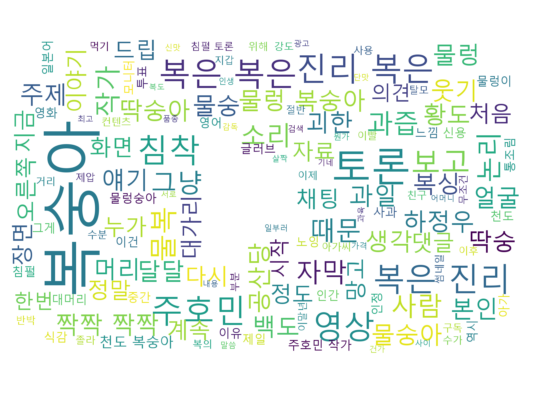

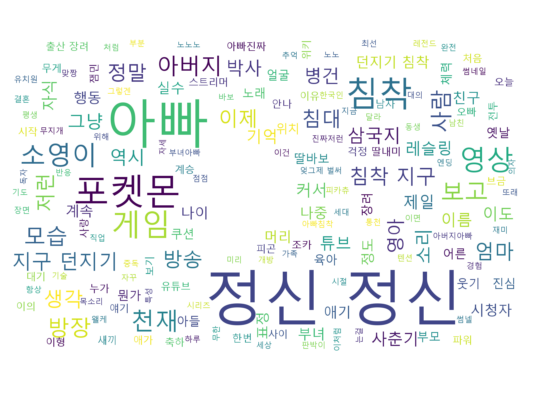

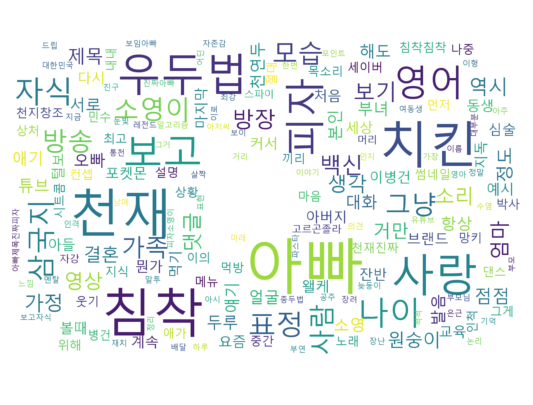

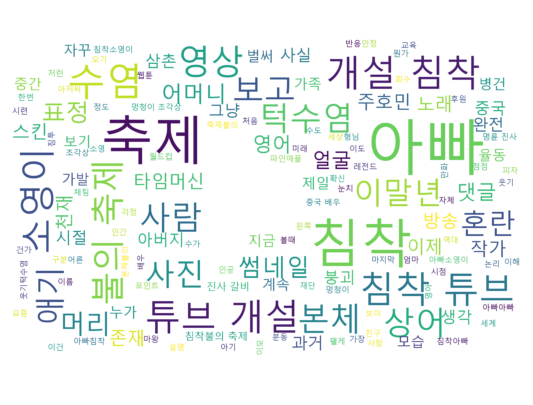

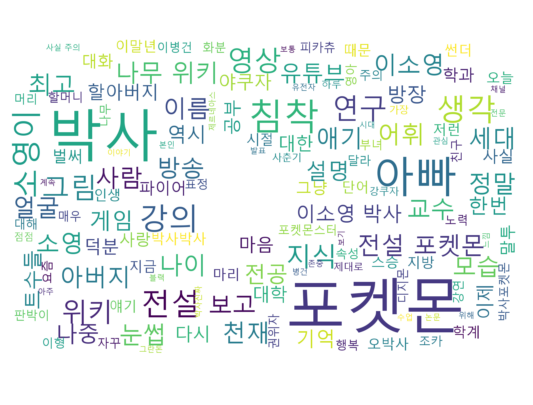

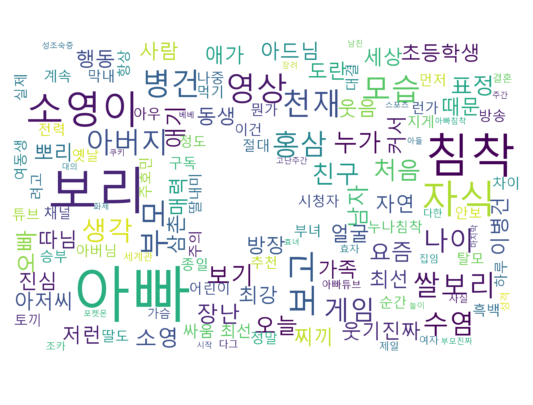

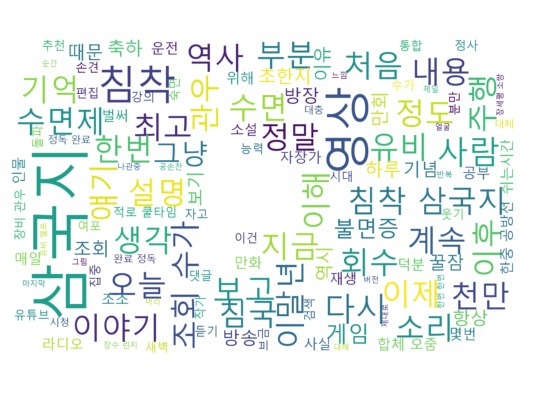

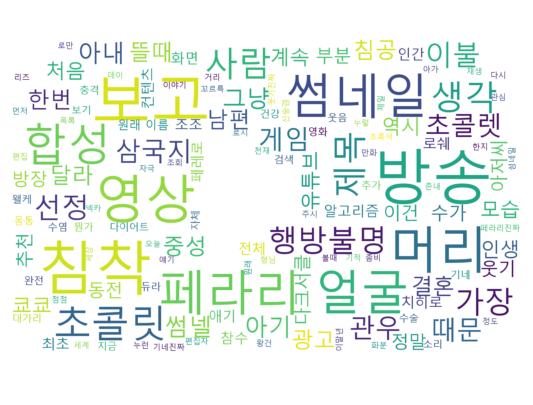

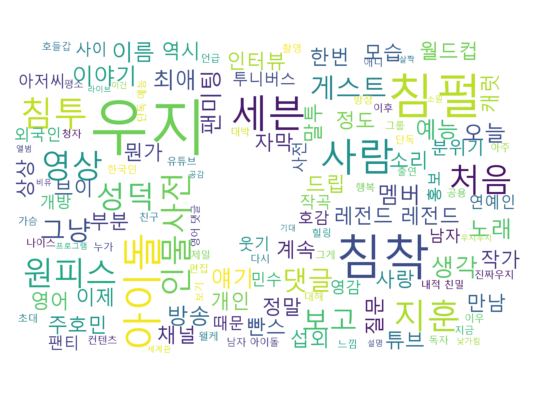

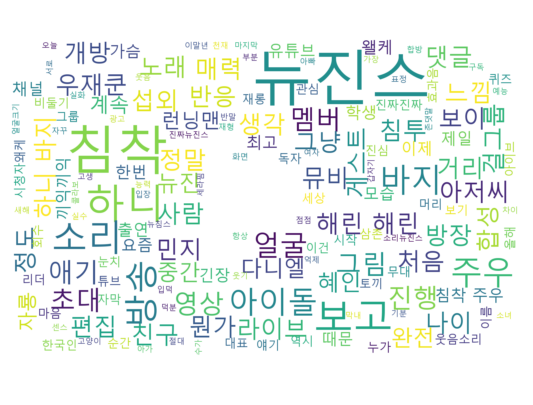

In [16]:
font_path = r'C:/Windows/Fonts/malgun.ttf'
youtube_mask = np.array(Image.open('./데이터/youtube_logo.jfif'))


# def make_colors(word, font_size, position, orientation, random_state, **kwargs):
#     r = random_state.randint(170, 220)
#     g = random_state.randint(0, 20)
#     b = random_state.randint(0, 60)
    
#     color = 'rgb(%d, %d, %d)' % (r,g,b)
#     return color

for df in new_df:
    string = ''
    for comment in df:
        string += ' '.join(comment)
        
    wc = WordCloud(font_path=font_path, background_color='white', stopwords=['개소리', '존나', '개', '진짜'], mask=youtube_mask,
           max_font_size=30, scale=7).generate(string)
    plt.figure(figsize=(10, 5))
    # wc.recolor(color_func=make_colors, random_state=True)
    plt.axis('off')
    plt.imshow(wc, interpolation='bilinear')
    plt.show()
    del string
    # wc.to_file(filename="침착맨_원피스.png")




In [35]:
import seaborn as sns
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]